In [2]:
import pandas as pd

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
df = pd.read_csv('./Output/entiresheet.csv')

In [4]:
df.columns

Index(['Gene_name', 'AH_seq', 'AH_localization', 'Group', 'phil_A', 'phob_A',
       'phil_G', 'phob_G', 'phil_V', 'phob_V', 'phil_L', 'phob_L', 'phil_I',
       'phob_I', 'phil_F', 'phob_F', 'phil_W', 'phob_W', 'phil_M', 'phob_M',
       'phil_Y', 'phob_Y', 'phil_C', 'phob_C', 'phil_S', 'phob_S', 'phil_T',
       'phob_T', 'phil_R', 'phob_R', 'phil_K', 'phob_K', 'phil_N', 'phob_N',
       'phil_Q', 'phob_Q', 'phil_D', 'phob_D', 'phil_E', 'phob_E', 'phil_H',
       'phob_H', 'phil_P', 'phob_P', 'Length', 'Hydrophobicity', 'H_moment',
       'Netcharge', 'Dfactor'],
      dtype='object')

In [27]:
df = df[df.Group != 4]

In [28]:
df_1 = df[['Group', 'phil_A', 'phil_G', 'phil_V', 'phil_L', 'phil_I',
       'phil_F', 'phil_W', 'phil_M', 'phil_Y', 'phil_C', 'phil_S', 
       'phil_T', 'phil_R', 'phil_K', 'phil_N', 'phil_Q', 'phil_D', 
       'phil_E', 'phil_H', 'phil_P']]

In [18]:
df_sub = df[['Group', 'phil_A', 'phob_A',
       'phil_G', 'phob_G', 'phil_V', 'phob_V', 'phil_L', 'phob_L', 'phil_I',
       'phob_I', 'phil_F', 'phob_F', 'phil_W', 'phob_W', 'phil_M', 'phob_M',
       'phil_Y', 'phob_Y', 'phil_C', 'phob_C', 'phil_S', 'phob_S', 'phil_T',
       'phob_T', 'phil_R', 'phob_R', 'phil_K', 'phob_K', 'phil_N', 'phob_N',
       'phil_Q', 'phob_Q', 'phil_D', 'phob_D', 'phil_E', 'phob_E', 'phil_H',
       'phob_H', 'phil_P', 'phob_P']]

In [20]:
df_sub.loc[:, 'phil_LI'] = df_sub.phil_I + df_sub.phil_L
df_sub['phil_FY'] = df_sub.phil_F + df_sub.phil_Y
df_sub['phil_ST'] = df_sub.phil_S + df_sub.phil_T
df_sub['phil_RK'] = df_sub.phil_R + df_sub.phil_K
df_sub['phil_DE'] = df_sub.phil_D + df_sub.phil_E
df_sub['phil_NQ'] = df_sub.phil_N + df_sub.phil_Q

In [21]:
df_sub = df_sub[['Group', 'phil_A', 'phil_G', 'phil_V',
       'phil_W', 'phil_M', 'phil_C', 'phil_H', 'phil_P', 'phil_LI',
       'phil_FY', 'phil_ST', 'phil_RK', 'phil_DE', 'phil_NQ']]

In [24]:
df.loc[0, :]

Gene_name                        KDSR
AH_seq             GLFRTIALFYLGSFDSIV
AH_localization           Golgi/ER/NE
Group                               1
phil_A                            0.0
phob_A                           0.11
phil_G                           0.22
phob_G                            0.0
phil_V                           0.11
phob_V                            0.0
phil_L                           0.22
phob_L                           0.11
phil_I                            0.0
phob_I                           0.22
phil_F                            0.0
phob_F                           0.33
phil_W                            0.0
phob_W                            0.0
phil_M                            0.0
phob_M                            0.0
phil_Y                            0.0
phob_Y                           0.11
phil_C                            0.0
phob_C                            0.0
phil_S                           0.11
phob_S                           0.11
phil_T      

In [22]:
df_sub.head()

,Group,phil_A,phil_G,phil_V,phil_W,phil_M,phil_C,phil_H,phil_P,phil_LI,phil_FY,phil_ST,phil_RK,phil_DE,phil_NQ
0,1,0.0,0.22,0.11,0.0,0.0,0.0,0.0,0.0,0.22,0.0,0.22,0.11,0.11,0.0
1,1,0.2,0.00,0.00,0.1,0.0,0.0,0.0,0.0,0.00,0.0,0.30,0.10,0.10,0.2
2,1,0.2,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.2,0.20,0.20,0.20,0.0
3,1,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.66,0.33,0.00,0.0
4,1,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.50,0.25,0.25,0.0


In [31]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data
data = df_1
features = data.columns[1:]
x = data.loc[:, features].values
y = data.loc[:, 'Group'].values
x = StandardScaler().fit_transform(x)

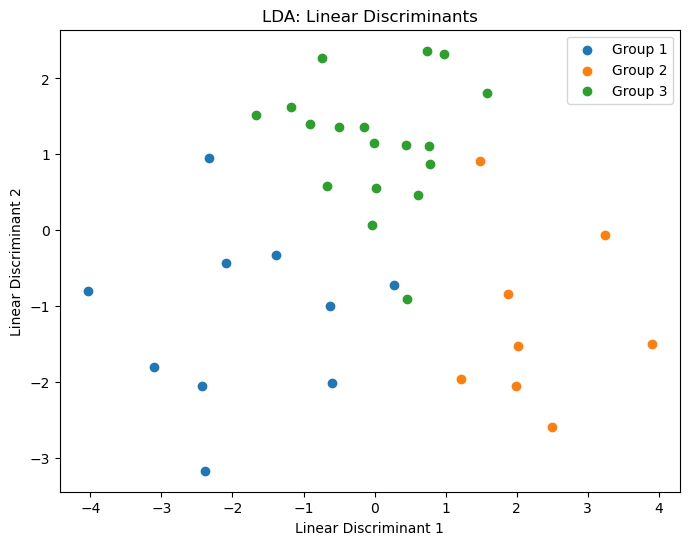

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=2)
lda_components = lda.fit_transform(x, y)
lda_df = pd.DataFrame(data=lda_components, columns=['Linear Discriminant 1', 'Linear Discriminant 2'])
lda_df['Group'] = y

# Plot LDA results
plt.figure(figsize=(8, 6))
for group in lda_df['Group'].unique():
    indices = lda_df['Group'] == group
    plt.scatter(lda_df.loc[indices, 'Linear Discriminant 1'],
                lda_df.loc[indices, 'Linear Discriminant 2'],
                label=f'Group {group}')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('LDA: Linear Discriminants')
plt.legend()
plt.show()

In [33]:
lda_coefficients = pd.DataFrame(lda.scalings_, columns=['Linear Discriminant 1', 'Linear Discriminant 2'], index=features)

# Displaying the LDA coefficients
print(lda_coefficients)

        Linear Discriminant 1  Linear Discriminant 2
phil_A              -5.972735              -5.538354
phil_G              -5.510509              -4.836733
phil_V              -2.836771              -2.842332
phil_L              -6.347612              -5.602009
phil_I              -2.245231              -3.261457
phil_F              -5.150605              -5.809356
phil_W              -2.721947              -1.929691
phil_M              -2.213887              -3.160655
phil_Y              -5.220209              -3.902936
phil_C              -2.514484              -2.173164
phil_S              -9.554422              -8.305826
phil_T              -6.538826              -6.462983
phil_R             -12.406845             -11.762676
phil_K              -7.951462              -6.825610
phil_N              -3.209181              -3.210219
phil_Q              -6.881135              -6.813584
phil_D              -5.210913              -5.523085
phil_E              -5.652510              -6.

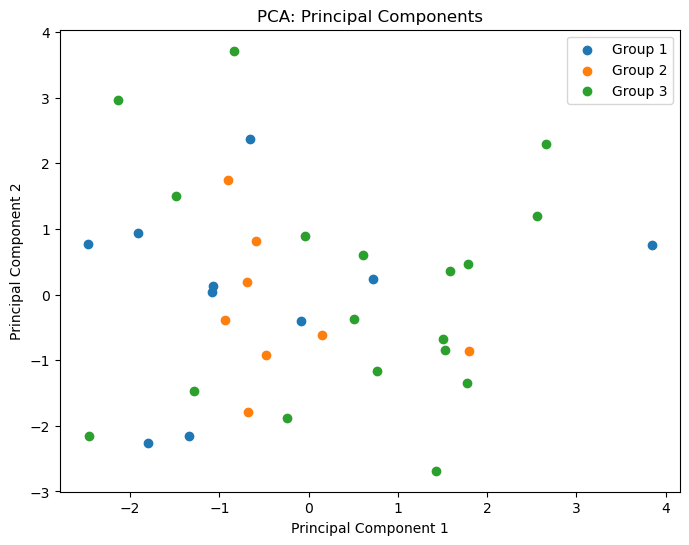

In [35]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
principal_df['Group'] = y

# Plot PCA results
plt.figure(figsize=(8, 6))
for group in principal_df['Group'].unique():
    indices = principal_df['Group'] == group
    plt.scatter(principal_df.loc[indices, 'Principal Component 1'],
                principal_df.loc[indices, 'Principal Component 2'],
                label=f'Group {group}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Principal Components')
plt.legend()
plt.show()